<img src="https://ecogenomics.github.io/CheckM/img/checkm.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Alvarado, Slendy** <--- CAMBIE POR LOS QUE CORRESPONDA A SUS DATOS

**03-08-2022**

<font color='red'>Color de texto</font>


### REQUERIMIENTOS PARA EL EXAMEN

Utilice de preferencia ```Jupyter``` de Anaconda, dado que tienen que hacer un control de cambios en cada pregunta. 

Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2022I_GBI6_ExamenPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 0 [0.5 puntos]
Realice cambios al cuaderno de jupyter: 
- Agregue el logo de la Universidad
<img src="logo.png" width=300 height=240 />
- Coloque sus datos personales 
- Escriba una **tabla** con las características de su computador 


## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dos funciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```science_plots```: la función debe 

- utilizar como argumento de entrada la data descargada por ```download_pubmed```
- ordenar los conteos de autores por país en orden ascedente y 
- seleccionar los cinco más abundantes. Con esta selección debe graficar un ```pie_plot```. Como guía para el conteo por países puede usar el ejemplo de [MapOfScience](https://github.com/CSB-book/CSB/blob/master/regex/solutions/MapOfScience_solution.ipynb). 

iii *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e **imprima docstring de cada función**.


In [19]:
import Bio
from Bio.Seq import Seq
from Bio import Entrez
import re

def download_pubmed (keyword):
    """
    Funcion que entrada pide al usuario la keyword tipo str y en output guarda un archivo que contiene los resultados de la 
    busqueda en base a los titulos/resumen. 
    """ 
    Entrez.email = "slendy.alvarado@est.ikiam.edu.ec"
    handle = Entrez.esearch(db="pubmed", 
                        term=keyword+"[Title/Abstract]",
                        retmax = 1000,
                        usehistory="y")
    record = Entrez.read(handle)
    id_list = record["IdList"]
    webenv = record["WebEnv"]
    query_key = record["QueryKey"]
    handle = Entrez.efetch(db="pubmed",
                       rettype="medline", 
                       retmode="text",  
                       webenv=webenv,
                       query_key=query_key)
    out_handle = open("data/"+keyword, "w")
    data = handle.read()
    (id_list)
    handle.close()
    out_handle.write(data)
    out_handle.close()
    return id_list 

import re 
import csv 
import matplotlib.pyplot as plt
from collections import Counter

def science_plots(data):
    """
    Funcion que pide como entrada la data de la funcion download_pubmeds y como resultado muestra un grafico tipo pastel 
    indicando a los cinco paises que aparecieron mas veces  . 
    """ 
    with open("data/"+data, errors="ignore") as l: 
        texto = l.read()
    texto = re.sub(r"\n\s{6}", " ", texto)
    ## expresion regular para la busqueda de la nacionalidad de los autores 
    pais = re.findall (r"AD\s{2}-\s[A-Za-z].*,\s([A-Za-z]*)\.\s", texto)
    conteo=Counter(pais)
    resultado={}
    ## En este bucle agregamos los paises y la frecuencia que se repite 
    for clave in conteo:  
        valor=conteo[clave]
        if valor > 1:
            resultado[clave] = valor
    ordenar = (sorted(resultado.values()))## ordena de forma ascendente 
    ordenar.sort(reverse=True) ##ordena a los cinco primeros paises con mayor frecuencia
    import operator
    ## creamos dos listas que contendra a los paises y frecuencias 
    countries = [] 
    counter = []
    
    ## bucle que añade los valores pais y frecuencia a la listas vacias pais y contador 
    reverse = sorted(resultado.items(), key=operator.itemgetter(1), reverse=True)   
    for name in enumerate(reverse):
        countries.append(name[1][0])
        counter.append(resultado[name[1][0]])
    mas_pais = countries[0:5] ## seleccionamos los cinco primeros paises 
    mas_frec = counter[0:5] ## seleccionamos las cinco primero frecuencia respecto a los paises 
    fig = plt.figure(figsize =(10, 7))
    plt.pie(mas_frec, labels = mas_pais)
    (plt.savefig("img/"+data, dpi=120, bbox_inches='tight'))
    plt.show()
    




In [20]:
import miningscience as msc 
help(download_pubmed)
help(science_plots)

Help on function download_pubmed in module __main__:

download_pubmed(keyword)
    Funcion que entrada pide al usuario la keyword tipo str y en output guarda un archivo que contiene los resultados de la 
    busqueda en base a los titulos/resumen.

Help on function science_plots in module __main__:

science_plots(data)
    Funcion que pide como entrada la data de la funcion download_pubmeds y como resultado muestra un grafico tipo pastel 
    indicando a los cinco paises que aparecieron mas veces  .




## Ejercicio 2 [2 puntos]


Utilice dos veces la función ```download_pubmed``` para: 

- Descargar la data, utilizando los keyword de su preferencia. 
- Guardar el archivo descargado en la carpeta ```data```.

Para cada corrida, imprima lo siguiente: 

```python
'El número artículos para KEYWORD es: XX' # Que se cargue con inserción de texto o valor que correspondea KEYWORD y XX
```

In [13]:
# Escriba aquí su código para el ejercicio 2
busqueda = download_pubmed ("Peptidology")
busqueda_1 = (download_pubmed ("R Ecuador"))
print ("El número articulos para Peptidology: ", len(busqueda))
print ("El número articulos para R Ecuador: ", len(busqueda_1))


El número articulos para Peptidology:  22
El número articulos para R Ecuador:  321


## Ejercicio 3 [1.5 puntos]

Utilice dos veces la función ```science_plots``` para: 

- Visualizar un pie_plot para cada data descargada en el ejercicio 2.
- Guardar los pie_plot en la carpeta ```img```

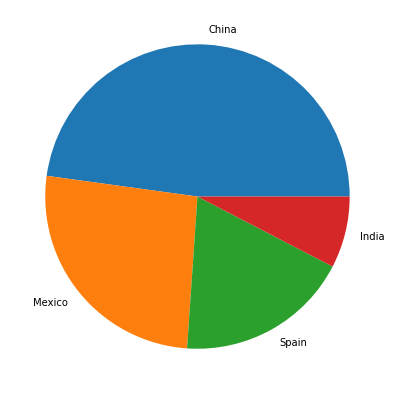

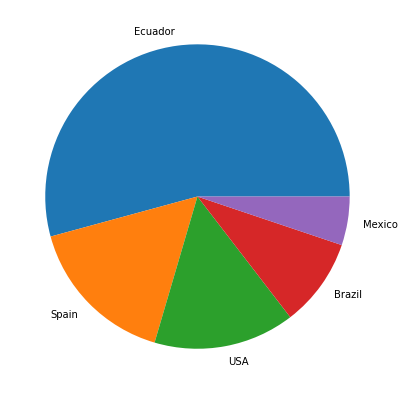

In [16]:
# Escriba aquí su código para el ejercicio 3


science_plots("Peptidology")

science_plots("R Ecuador")















## Ejercicio 4 [1 punto]

**Interprete** los resultados de las figuras del **ejercicio 3**

*Escriba la respuesta del ejercicio 5*

En la busqueda de "Ecuador chagas" se pudo obtener 71 articulos que es numero relativo bajo debido a que el chagas se encuentra en la lista de enfermedades tropicales desantendidas. El grafico nos muestra que la mayoria de los autores son de origen Ecuatoriano. En el segundo y tercero hay dos paises europeos España e Italia respectivamente, siendo un posible indicador que serían los paises que colaboran con la investigación sobre el mal de chagas en Ecuador. Finalmente estan Colombia y Brasil que segun datos son paises tropicales que presentan un importante indice de la enfermedad. 

En la busqueda de "Ecuador QSAR" se pudieron obtener 11 articulos, resultados esperados debido a que QSAR es una metodologia de quimioinformática que sirve para predecir la estructura-funcion de posibles candidatos a moleculas terapeuticas y que es poco utilizado en Ecuador. Debido a la busqueda el pais que presento mayor frecuencia fue Ecuador, seguida de España y Francia indicando que son paises que colaboran constantemente en el area de quimioinformática. Finalmente estan los paises de Colombia y Cuba 

.

.

## Ejercicio 5 [2 puntos]

Para algún **gen de las enzimas que intervienen en la ruta metabolica de la gluconeogenesis** ([Lista de genes por tipología](https://www.genome.jp/pathway/map00010+C00068)), realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda y guarde en la carpeta ```data```.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de las secuencias de los **quince primeros** IDs de la accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Guarde su arbol filogénetico en la carpeta ```img```


5. Interprete el árbol del paso 4. 

In [163]:
# Escriba aquí su código para el ejercicio 6

from Bio import Phylo
from Bio import SeqIO
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
# cargar biopython o sus módulo, funciones
from Bio import Entrez
import re
import os 
from Bio.Align.Applications import ClustalwCommandline

with open("sequence.seq") as f:
    data = f.readlines()[0:15]
out_sequence = open("secuencias.fasta", "w")
for linea in data:  
    Entrez.email="adriana.pujota@est.ikiam.edu.ec"
    handle=Entrez.efetch(db="nucleotide" ,id=linea ,rettype="fasta", retmode="text")
    data=(handle.read())
    out_sequence.write(data)
out_sequence.close()

In [164]:
clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "secuencias.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr = clustalw_cline()
print(clustalw_cline)
ClustalAlign = AlignIO.read("secuencias.aln", "clustal")
print(ClustalAlign)

"C:\Program Files (x86)\ClustalW2\clustalw2.exe" -infile=secuencias.fasta
Alignment with 15 rows and 11061 columns
--------------------------------------------...TTC X53717.1
--------------------------------------------...--- X66258.1
--------------------------------------------...--- AB019241.1
--------------------------------------------...--- X00676.1
--------------------------------------------...--- AY239502.1
--------------------------------------------...--- AY239500.1
--------------------------------------------...--- AY239504.1
--------------------------------------------...--- AY239503.1
--------------------------------------------...--- AY239505.1
--------------------------------------------...--- EU441169.1
--------------------------------------------...--- EU441168.1
--------------------------------------------...--- AY239501.1
GAATTCATTCAAGTTGAATCGGTCTGTAACTTTTTACTTAGATT...--- AB040746.1
--------------------------------------------...--- AB016867.1
-----------------------

In [165]:
from Bio import Phylo
tree = Phylo.read("secuencias.dnd", "newick")

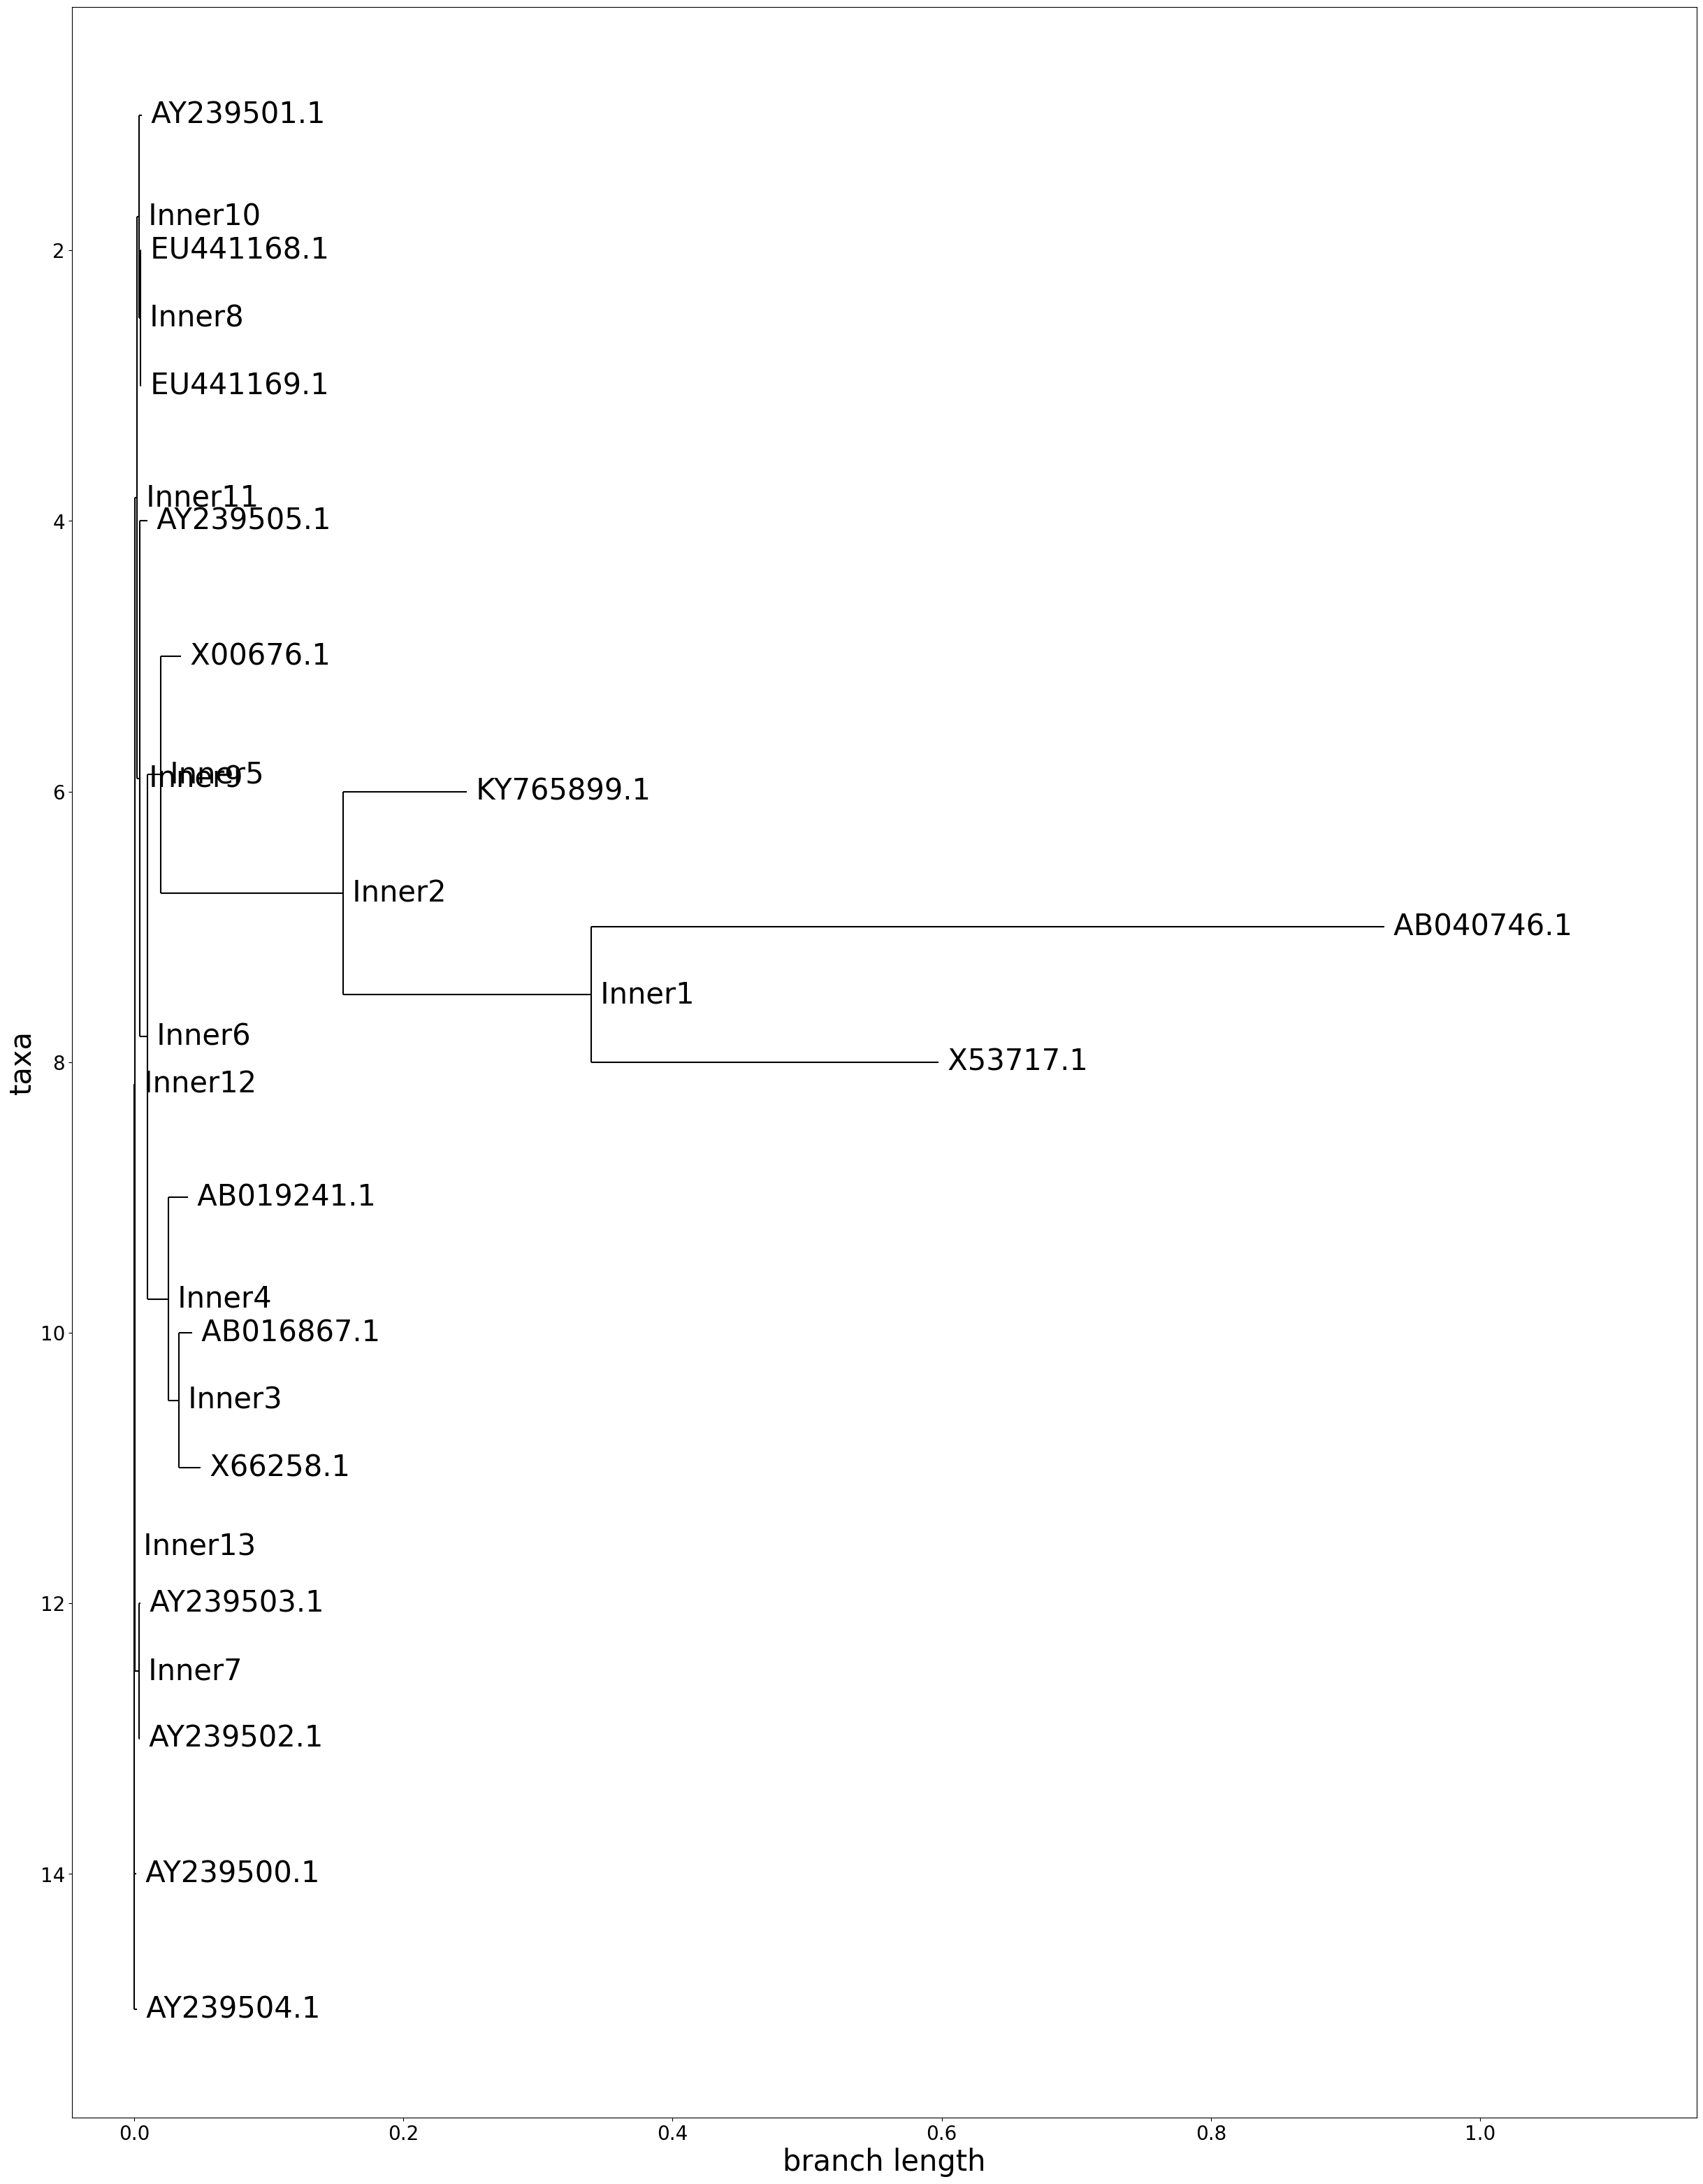

In [169]:
with open("secuencias.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
    
from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')
 
distance_matrix = calculator.get_distance(alignment)


from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)
# Construir el arbol 
mic_tree = constructor.build_tree(alignment)
mic_tree.rooted = True
Phylo.write(mic_tree, "tree.xml", "phyloxml")

mic_tree = Phylo.read(file="tree.xml", format= "phyloxml")

# Arbol elemental en Matplotlib
import matplotlib
import matplotlib.pyplot as plt
#fig = Phylo.draw(cis_tree)

fig = plt.figure(figsize=(30, 40), dpi=100) # create figure & set the size 
matplotlib.rc('font', size=30)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=20)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=20)       # fontsize of the tick labels
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(mic_tree, axes=axes)
fig.savefig("img/mic_tree.jpg")

**Escriba aquí la interpretación del árbol**

En el dendograma se puede distinguir que existieron 7 clados definidos con respecto al gen MYC que codifica phosphoprotein t que juega un rol clave en las rutas metabolicas de la glucolisis. Las secuencias que presentaron mayor similitud fue la de AB40746.1 y X53717.1 dado que fueron las que compartieron cuatro clados. 

## Ejercicio 6 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente:
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada
- Un diagrama de procesos del módulo ```miningscience```
3. Asegurarse que su repositorio tiene las carpetas ```data``` e ```img``` con los archivos que ha ido guardando en las preguntas anteriores.  
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 5), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado el ejercicio 1  
```
```sh 
Carlitos Alimaña ha realizado el ejercicio 2
```
```sh 
...
```
